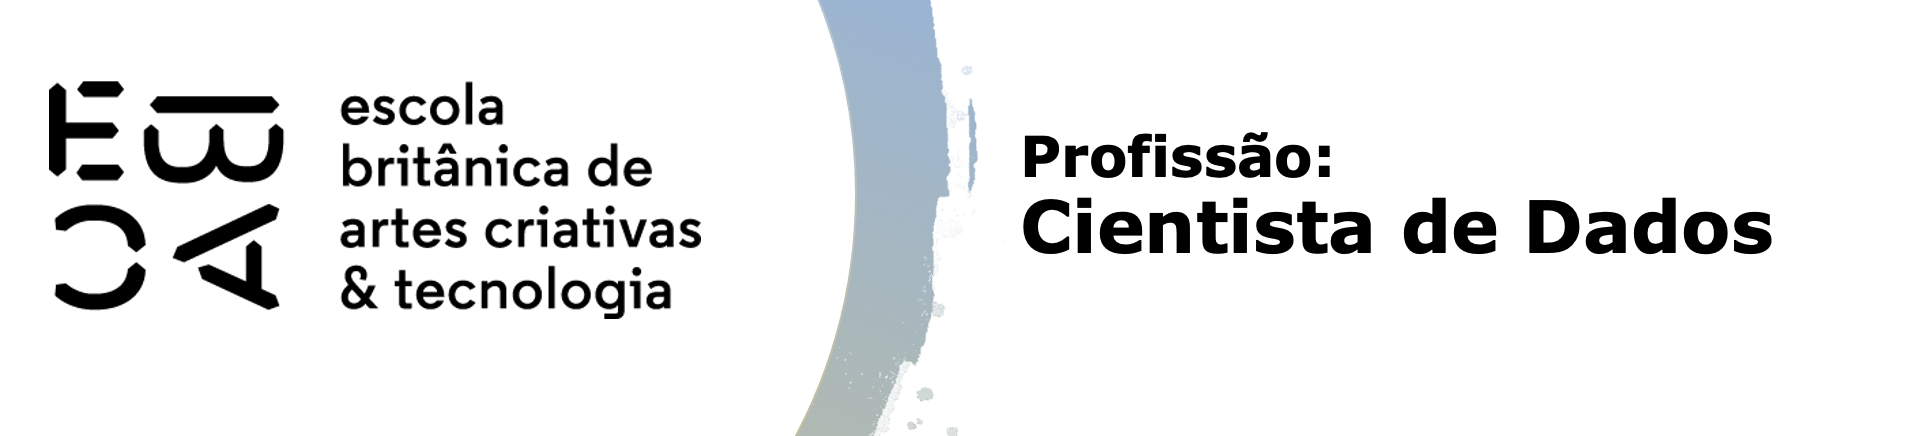

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
import time
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [20]:
path = r'C:\Users\shinoki\Documents\data_science\tarefa_python\\'

X_train = pd.read_csv(path + 'X_train_processed.csv', index_col=[0, 1])
X_test = pd.read_csv(path + 'X_test_processed.csv', index_col=[0, 1])
y_train = pd.read_csv("UCI HAR Dataset/train/y_train.txt", header=None)[0]
y_test = pd.read_csv(path + 'y_test.csv', index_col=0)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print


X_train: (7352, 561)
X_test: (2947, 561)
y_train: (7352, 0)


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [5]:
for col in top3_features:
    print(col in X_train.columns)


True
True
True


ccp_alphas calculados:
[0.00000000e+00 6.43621258e-06 6.59906426e-06 6.65079323e-06
 8.57020268e-06 1.13900758e-05 1.18345542e-05 1.58251025e-05
 1.65530622e-05 2.30817423e-05 2.84988860e-05 2.94533941e-05
 3.19901575e-05 3.88621172e-05 4.71527022e-05 5.07449569e-05
 5.32966179e-05 5.87197700e-05 5.89560414e-05 5.91842553e-05
 5.95406071e-05 7.20748845e-05 7.96357451e-05 8.02457230e-05
 8.07092370e-05 8.57501064e-05 9.41898720e-05 1.12050949e-04
 1.15231709e-04 1.17256388e-04 1.35961757e-04 1.53839028e-04
 1.57089905e-04 1.71454722e-04 2.10262760e-04 2.10826986e-04
 2.23781025e-04 2.36833627e-04 2.40076491e-04 2.41883178e-04
 2.45372701e-04 2.66998967e-04 2.79807244e-04 2.88909781e-04
 2.97474754e-04 3.09949363e-04 3.16690616e-04 3.18599930e-04
 3.39245935e-04 3.54071071e-04 3.62028531e-04 3.68605227e-04
 3.78579953e-04 3.93551983e-04 3.98164316e-04 4.13719623e-04
 4.24592719e-04 4.45010651e-04 4.80851486e-04 5.50222809e-04
 5.82410780e-04 5.83304293e-04 5.96077304e-04 6.03572253e-04
 

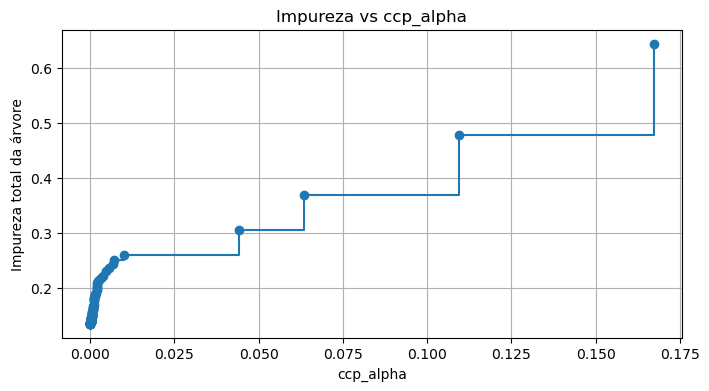

CPU times: total: 422 ms
Wall time: 843 ms


In [7]:
%%time

y_train_vector = y_train  

top3_features = ['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)']
X_train_top3 = X_train[top3_features]

clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
path = clf.cost_complexity_pruning_path(X_train_top3, y_train_vector)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

print("ccp_alphas calculados:")
print(ccp_alphas)

plt.figure(figsize=(8,4))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Impureza total da árvore")
plt.title("Impureza vs ccp_alpha")
plt.grid(True)
plt.show()



### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [15]:
%%time

start_time = time.time()

top3_features = ['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)']
X_train_top3 = X_train[top3_features]

kf = KFold(n_splits=10, shuffle=True, random_state=42)

alphas = ccp_alphas[::10]

resultados = []

for alpha in alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha, min_samples_leaf=20)
    scores = cross_val_score(clf, X_train_top3, y_train, cv=kf)
    media = scores.mean()
    std = scores.std()
    resultados.append((alpha, media, std))

df_resultados = pd.DataFrame(resultados, columns=['ccp_alpha', 'mean_accuracy', 'std_accuracy'])

df_resultados = df_resultados.sort_values(by='mean_accuracy', ascending=False)

melhor_alpha = df_resultados.iloc[0]
print("Melhor ccp_alpha encontrado:")
print(melhor_alpha)

tempo_total = time.time() - start_time
print(f"\nTempo total: {tempo_total:.2f} segundos")



Melhor ccp_alpha encontrado:
ccp_alpha        0.000836
mean_accuracy    0.876495
std_accuracy     0.011962
Name: 7, dtype: float64

Tempo total: 3.35 segundos
CPU times: total: 3.25 s
Wall time: 3.35 s


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [18]:
print("y_test shape:", y_test.shape)
print("y_test tipo:", type(y_test))
print("y_test exemplo:", y_test[:5])


y_test shape: (2947, 0)
y_test tipo: <class 'pandas.core.frame.DataFrame'>
y_test exemplo: Empty DataFrame
Columns: []
Index: [5, 5, 5, 5, 5]


In [21]:
path = r'C:\Users\shinoki\Documents\data_science\tarefa_python\UCI HAR Dataset\\'

y_train = pd.read_csv(path + 'train\\y_train.txt', header=None, names=['activity'])
y_test = pd.read_csv(path + 'test\\y_test.txt', header=None, names=['activity'])

y_train.to_csv(path + 'y_train.csv', index=False)
y_test.to_csv(path + 'y_test.csv', index=False)

print("y_train sample:")
print(y_train.head())

print("\ny_test sample:")
print(y_test.head())


y_train sample:
   activity
0         5
1         5
2         5
3         5
4         5

y_test sample:
   activity
0         5
1         5
2         5
3         5
4         5


In [22]:
y_train = pd.read_csv(path + 'y_train.csv')
y_test = pd.read_csv(path + 'y_test.csv')

print("Formato y_train:", y_train.shape)
print("Formato y_test:", y_test.shape)


Formato y_train: (7352, 1)
Formato y_test: (2947, 1)


Acurácia na base de teste: 0.6831


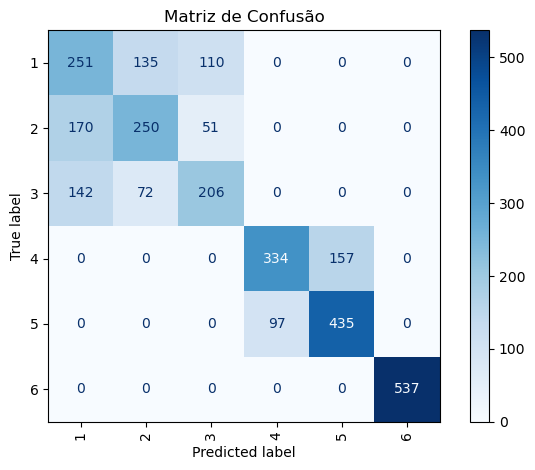

In [23]:
melhor_ccp_alpha = melhor_alpha['ccp_alpha']
clf_final = DecisionTreeClassifier(random_state=42, ccp_alpha=melhor_ccp_alpha, min_samples_leaf=20)
clf_final.fit(X_train[top3_features], y_train)

y_pred = clf_final.predict(X_test[top3_features])

acc = accuracy_score(y_test, y_pred)
print(f"Acurácia na base de teste: {acc:.4f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_final.classes_)
disp.plot(cmap="Blues", xticks_rotation='vertical')
plt.title("Matriz de Confusão")
plt.tight_layout()
plt.show()


### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

Top 3 variáveis importantes para variável binária 'is_class1':
['fBodyAccMag-std()', 'tBodyGyroJerk-mad()-X', 'tGravityAcc-arCoeff()-X,1']
Variáveis combinadas para o modelo final: ['fBodyAccMag-std()', 'tGravityAcc-arCoeff()-X,1', 'tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'tBodyGyroJerk-mad()-X', 'angle(Y,gravityMean)']
Acurácia na base de teste com as 6 variáveis: 0.8235


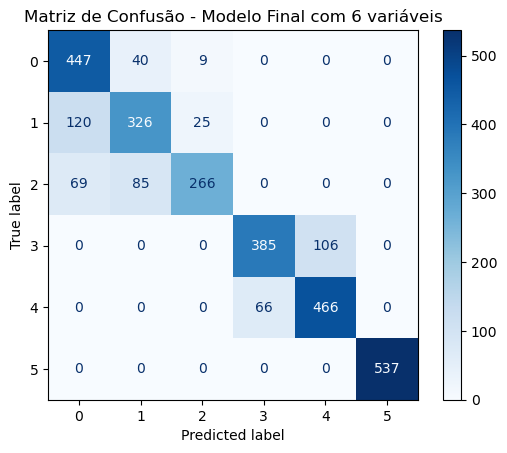

In [27]:
classe_erro = 1
y_train['is_class1'] = (y_train['activity'] == classe_erro).astype(int)
y_test['is_class1'] = (y_test['activity'] == classe_erro).astype(int)

clf_bin = DecisionTreeClassifier(random_state=42, min_samples_leaf=20, max_depth=4)
clf_bin.fit(X_train, y_train['is_class1'])

importancias_bin = pd.Series(clf_bin.feature_importances_, index=X_train.columns)
top3_bin_features = importancias_bin.sort_values(ascending=False).head(3).index.tolist()

print("Top 3 variáveis importantes para variável binária 'is_class1':")
print(top3_bin_features)

top3_features_orig = ['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)']

top6_features = list(set(top3_features_orig + top3_bin_features))

print(f"Variáveis combinadas para o modelo final: {top6_features}")

melhor_ccp_alpha = 0.000836  

clf_final = DecisionTreeClassifier(random_state=42, ccp_alpha=melhor_ccp_alpha, min_samples_leaf=20)
clf_final.fit(X_train[top6_features], y_train['activity'])

y_pred = clf_final.predict(X_test[top6_features])
acc = accuracy_score(y_test['activity'], y_pred)
print(f"Acurácia na base de teste com as 6 variáveis: {acc:.4f}")

cm = confusion_matrix(y_test['activity'], y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Modelo Final com 6 variáveis')
plt.show()
